<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

LEFT_PATH = 'data/bb_left_forearm_csv/'
RIGHT_PATH = 'data/bb_right_forearm_csv/'
PATH = 'data/bb_capture/'

  0%|          | 0/4 [00:00<?, ?it/s]

bb_capture_capture_2018_03_23_12_54_35.csv


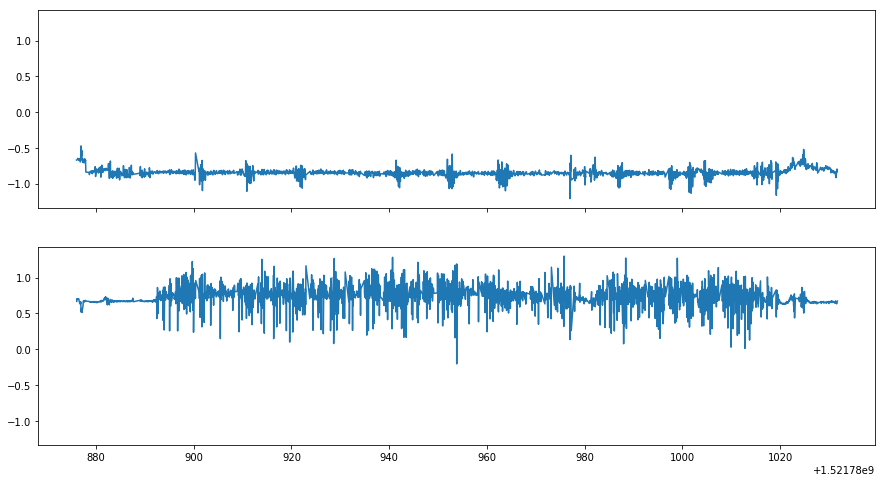

 25%|██▌       | 1/4 [00:03<00:10,  3.54s/it]

bb_capture_capture_2018_03_23_13_08_43.csv


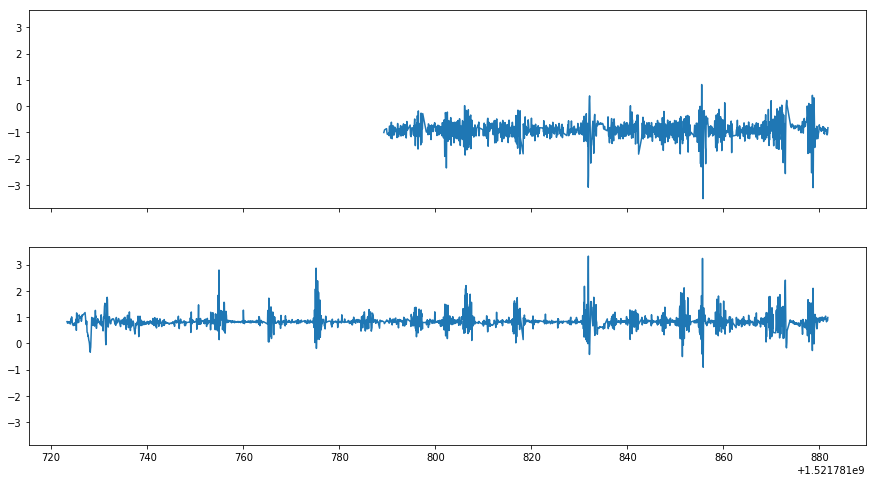

 50%|█████     | 2/4 [00:06<00:06,  3.43s/it]

bb_capture_capture_2018_03_23_12_51_28.csv


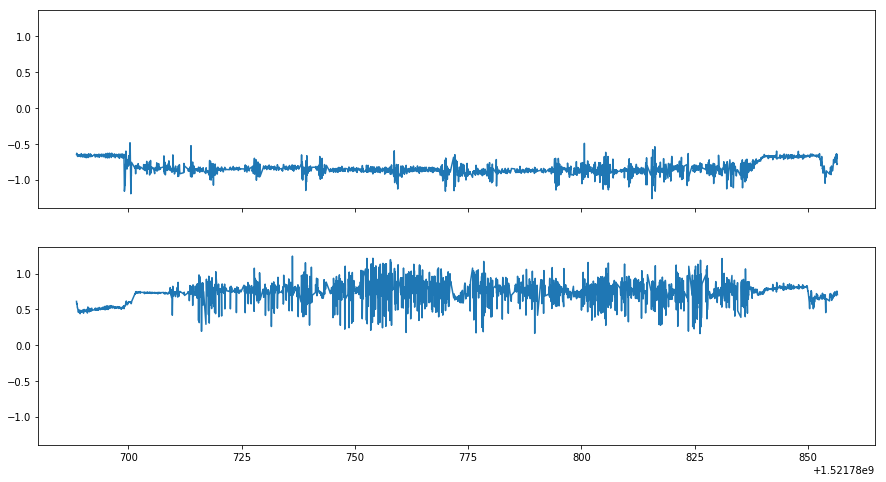

 75%|███████▌  | 3/4 [00:10<00:03,  3.50s/it]

bb_capture_capture_2018_03_23_12_58_32.csv


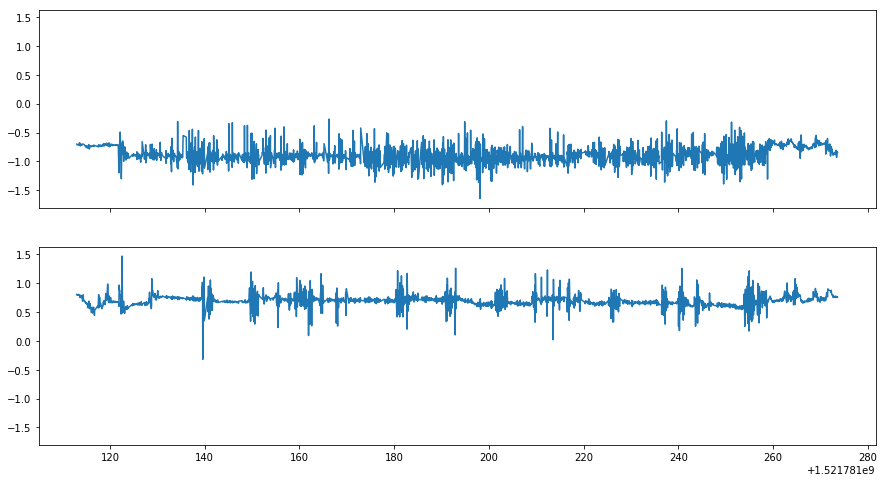

100%|██████████| 4/4 [00:14<00:00,  3.54s/it]


In [2]:
files = next(os.walk(PATH))[2]
for id_, filename in tqdm(enumerate(files), total=len(files)):
    bb_df = pd.read_csv(PATH + filename)
    lb = float(bb_df.head(1)['timestamp'])
    rb = float(bb_df.tail(1)['timestamp'])
    
    print(filename)
    
    fig, ax = plt.subplots(2, 1, sharex='all', sharey='all', figsize=(15, 8))
    
    df = pd.read_csv(LEFT_PATH + 'leftarm_' + filename)
    df = df[(df['timestamp'] >= lb) & (df['timestamp'] <= rb)]
    
    ax[0].plot(df['timestamp'], df['imu_ax'])
    
    
    df = pd.read_csv(RIGHT_PATH + 'rightarm_' + filename)
    df = df[(df['timestamp'] >= lb) & (df['timestamp'] <= rb)]
    
    ax[1].plot(df['timestamp'], df['imu_ax'])
    plt.show()
        